<a href="https://colab.research.google.com/github/shumshersubashgautam/YoloV8-Birds-Nepali-Names/blob/main/YOLOV8_bird10_NepaliNames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Nov 14 10:27:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!ls

bird05.zip  sample_data


In [4]:
# Pip install method (recommended)

!pip install ultralytics
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.25M/6.25M [00:00<00:00, 111MB/s]
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 94.9MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 59.0ms
Speed: 11.7ms preprocess, 59.0ms inference, 752.4ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


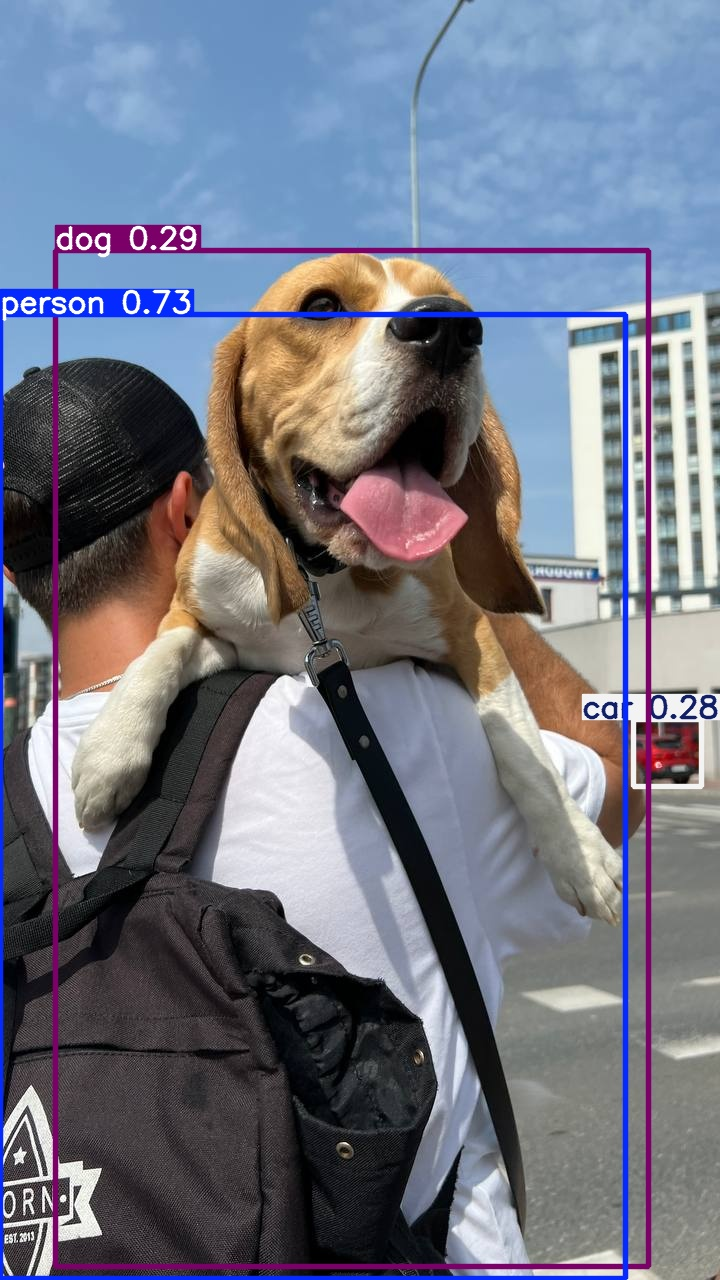

In [8]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpg', height=600)

In [9]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 45.2ms
Speed: 2.5ms preprocess, 45.2ms inference, 629.1ms postprocess per image at shape (1, 3, 640, 384)


In [10]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [11]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [12]:
results[0].boxes.cls


tensor([ 0., 16.,  2.], device='cuda:0')

In [15]:
!unzip bird05.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/bird05/train/labels/ML301764381_jpg.rf.0ada6984b45a3e7033fb5cbda4a908a1.txt  
  inflating: /content/bird05/train/labels/ML301764391_jpg.rf.c587c1101f61921caaf3654371bb5573.txt  
  inflating: /content/bird05/train/labels/ML301764401_jpg.rf.10ee9540c29b33f36727b8849650506b.txt  
  inflating: /content/bird05/train/labels/ML302025221_jpg.rf.fe188d39be84dbc6e8e5153921933a7d.txt  
  inflating: /content/bird05/train/labels/ML302059461_jpg.rf.ef0a84990dcae3eb854bf466cdd297ab.txt  
  inflating: /content/bird05/train/labels/ML303588841_jpg.rf.2a857d9b3483e426332dae1dada6cda5.txt  
  inflating: /content/bird05/train/labels/ML303857891_jpg.rf.1d41646afa6cd9e14796a12b4115f850.txt  
  inflating: /content/bird05/train/labels/ML304606121_jpg.rf.e168d20adea3c928b3ce1243ed2229c6.txt  
  inflating: /content/bird05/train/labels/ML304688421_jpg.rf.cef0055280be59f9ec1b2a1e406e1992.txt  
  inflating: /content/bird05/train/labels/ML30473

In [16]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/bird05/data.yaml epochs=30 imgsz=800 plots=True

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/bird05/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

In [17]:
!ls {HOME}/runs/detect/train2/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1731580975.8174a28e9376.6249.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


In [ ]:
!mv  /content/data.yaml /content/bird

/content


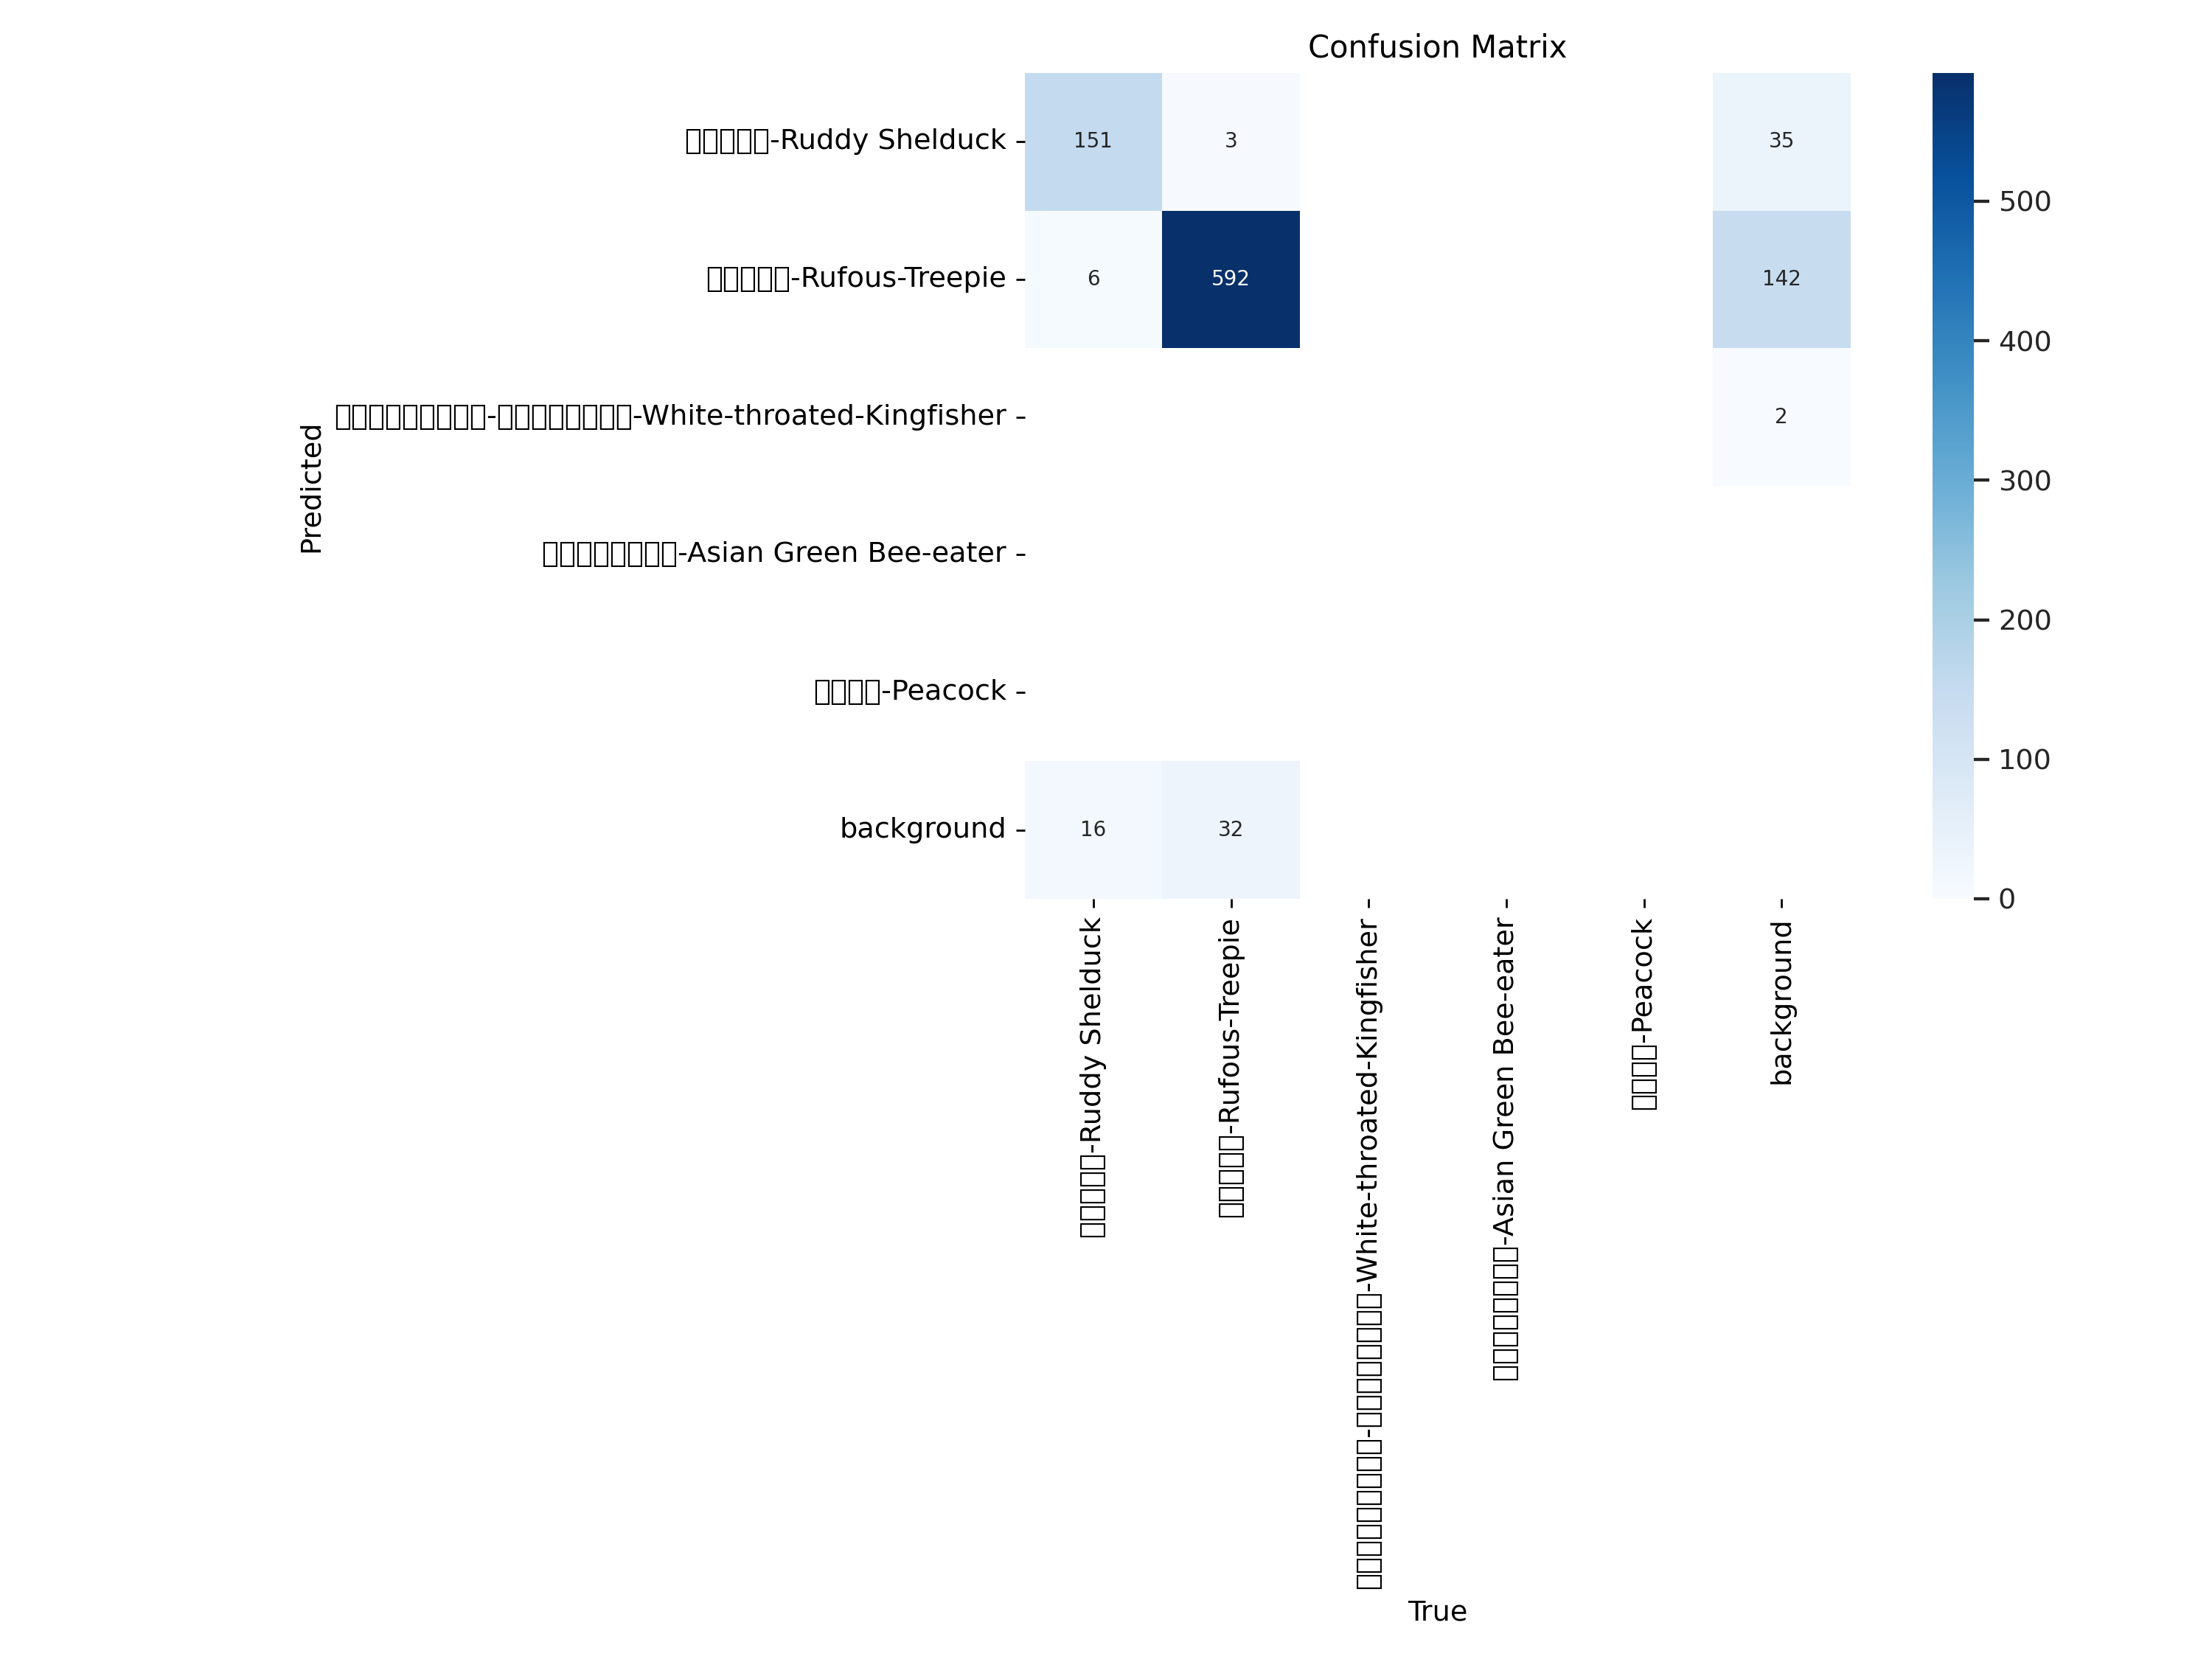

In [18]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=600)

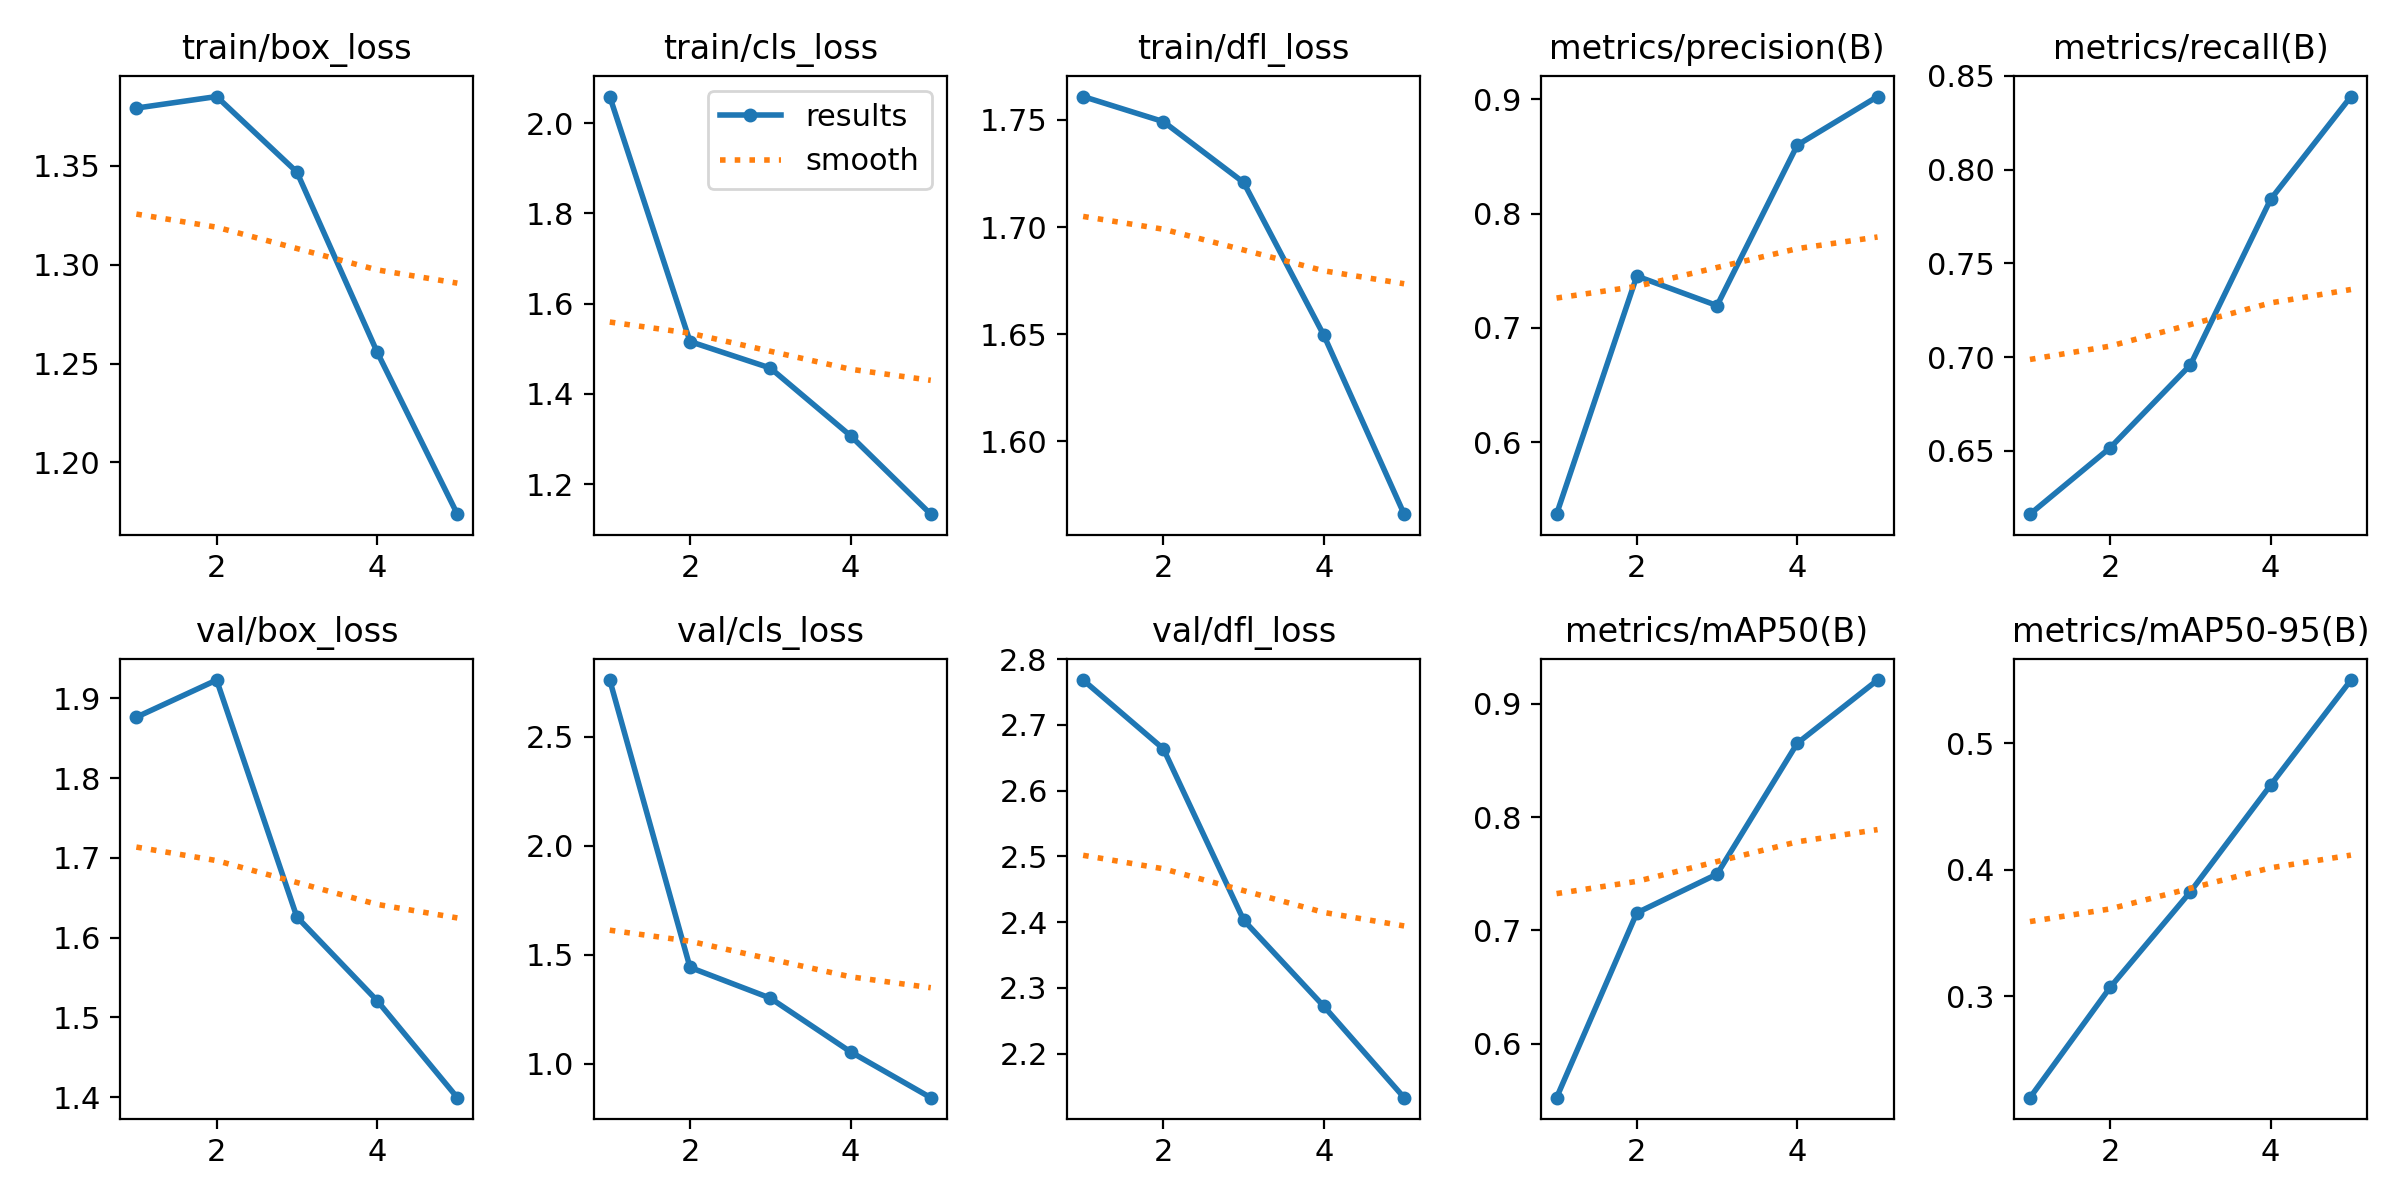

In [19]:
Image(filename=f'/content/runs/detect/train2/results.png', width=600)

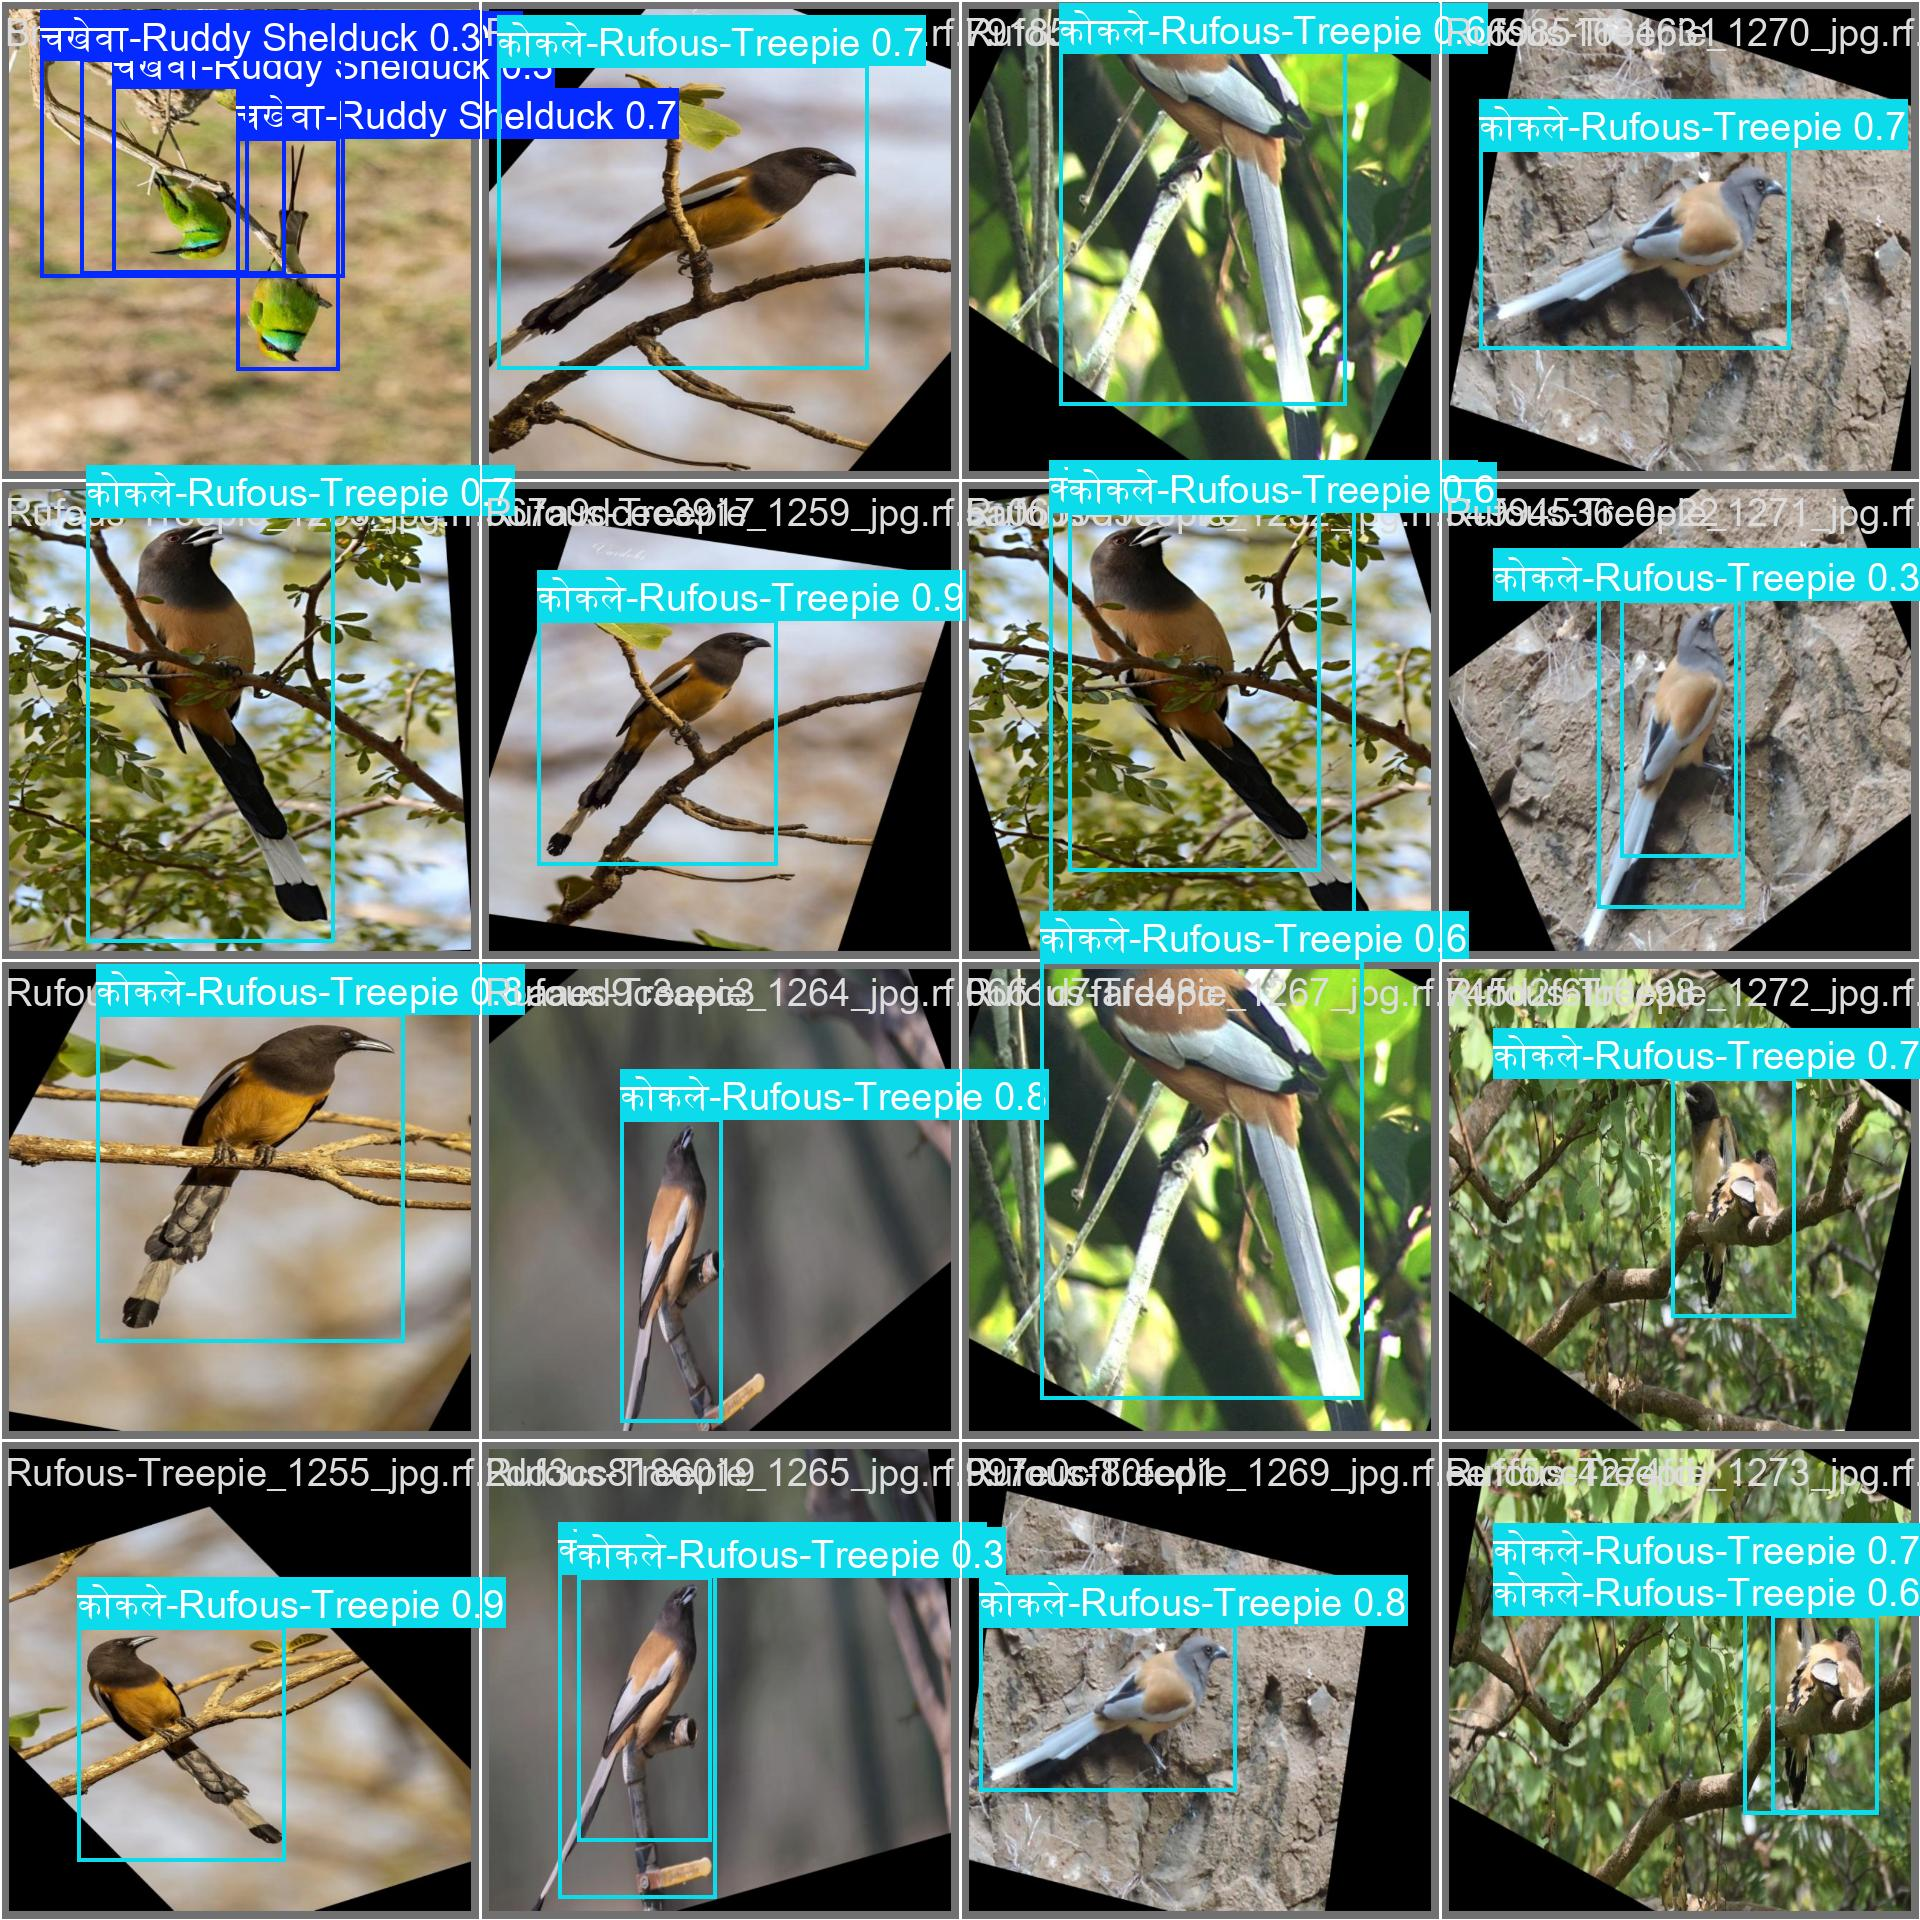

In [20]:
Image(filename=f'/content/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [21]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/bird05/data.yaml

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/bird05/valid/labels.cache... 727 images, 0 backgrounds, 0 corrupt: 100% 727/727 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 46/46 [00:15<00:00,  3.05it/s]
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:470: UserWarning: Glyph 2330 (\N{DEVANAGARI LETTER CA}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:470: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:470: UserWarning: Glyph 2326 (\N{DEVANAGARI LETTER KHA}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages

In [22]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source=/content/bird05/valid/images  plots = True

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs

image 1/727 /content/bird05/valid/images/Brown-Headed-Barbet_1004_jpg.rf.391970a03c30e9f9df83a30feae0636d.jpg: 800x800 3 चखेवा-Ruddy Shelducks, 22.8ms
image 2/727 /content/bird05/valid/images/Brown-Headed-Barbet_1011_jpg.rf.7e5bea50ba21bbf3691711ac0e3bafe0.jpg: 800x800 1 चखेवा-Ruddy Shelduck, 22.9ms
image 3/727 /content/bird05/valid/images/Brown-Headed-Barbet_1028_jpg.rf.57c648bb9d3bc72143447aba4610a05e.jpg: 800x800 2 चखेवा-Ruddy Shelducks, 22.8ms
image 4/727 /content/bird05/valid/images/Brown-Headed-Barbet_1048_jpg.rf.2e5e23c866557f9a1ec2d4aa9a4c0ed6.jpg: 800x800 1 चखेवा-Ruddy Shelduck, 22.8ms
image 5/727 /content/bird05/valid/images/Brown-Headed-Barbet_1061_jpg.rf.90b79c05fff5198b4ab14e0ec2bc4d0f.jpg: 800x800 2 चखेवा-Ruddy Shelducks, 22.8ms
image 6/727 /content/bird05/valid/images/Brown-Headed-Barbet_1069_jpg.rf.e834e100

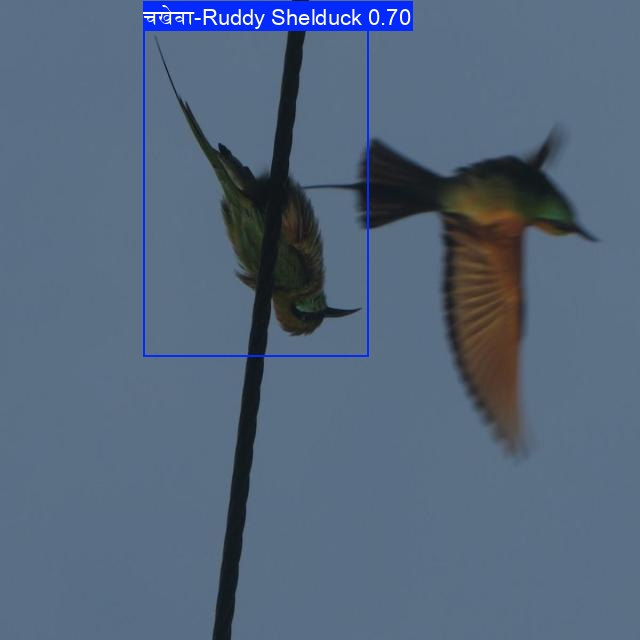

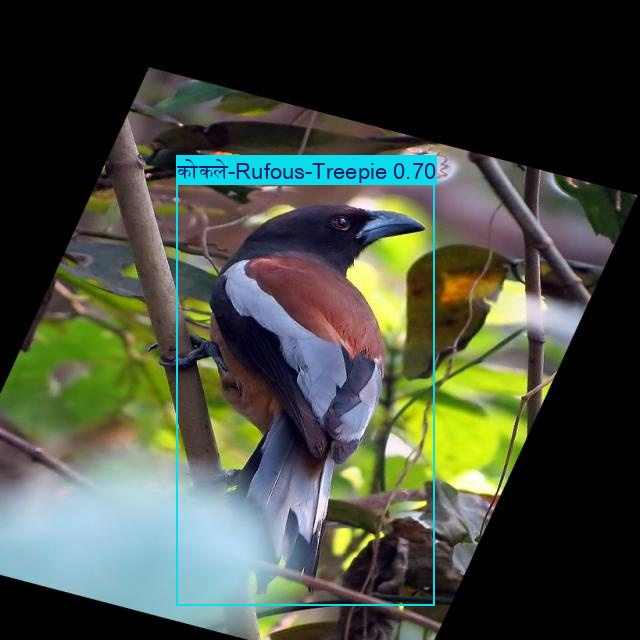

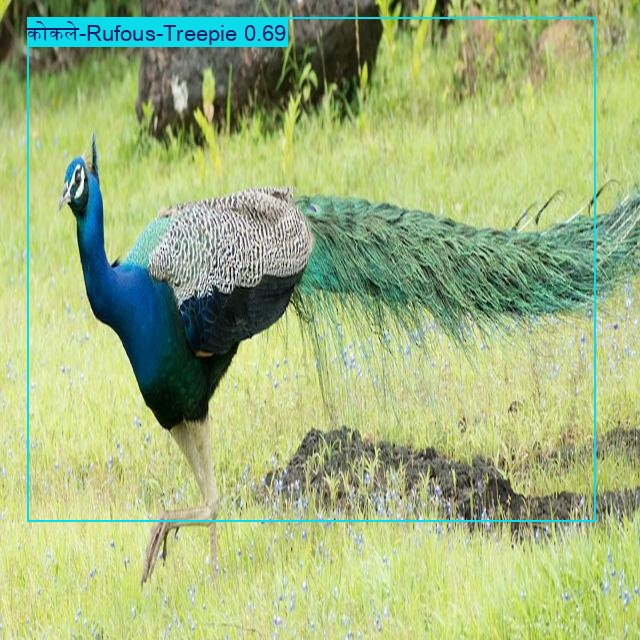

In [23]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [24]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/bird05/data.yaml

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/bird05/valid/labels.cache... 727 images, 0 backgrounds, 0 corrupt: 100% 727/727 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 46/46 [00:14<00:00,  3.17it/s]
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:470: UserWarning: Glyph 2330 (\N{DEVANAGARI LETTER CA}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:470: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:470: UserWarning: Glyph 2326 (\N{DEVANAGARI LETTER KHA}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages

In [25]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source=/content/bird05/valid/images save=True

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs

image 1/727 /content/bird05/valid/images/Brown-Headed-Barbet_1004_jpg.rf.391970a03c30e9f9df83a30feae0636d.jpg: 800x800 3 चखेवा-Ruddy Shelducks, 22.9ms
image 2/727 /content/bird05/valid/images/Brown-Headed-Barbet_1011_jpg.rf.7e5bea50ba21bbf3691711ac0e3bafe0.jpg: 800x800 1 चखेवा-Ruddy Shelduck, 22.9ms
image 3/727 /content/bird05/valid/images/Brown-Headed-Barbet_1028_jpg.rf.57c648bb9d3bc72143447aba4610a05e.jpg: 800x800 2 चखेवा-Ruddy Shelducks, 22.9ms
image 4/727 /content/bird05/valid/images/Brown-Headed-Barbet_1048_jpg.rf.2e5e23c866557f9a1ec2d4aa9a4c0ed6.jpg: 800x800 1 चखेवा-Ruddy Shelduck, 22.9ms
image 5/727 /content/bird05/valid/images/Brown-Headed-Barbet_1061_jpg.rf.90b79c05fff5198b4ab14e0ec2bc4d0f.jpg: 800x800 2 चखेवा-Ruddy Shelducks, 22.8ms
image 6/727 /content/bird05/valid/images/Brown-Headed-Barbet_1069_jpg.rf.e834e100

In [27]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source=/content/bird05/valid/images/Brown-Headed-Barbet_1214_jpg.rf.63de7035c4a86a1c63a215167f875eee.jpg


Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/bird05/valid/images/Brown-Headed-Barbet_1214_jpg.rf.63de7035c4a86a1c63a215167f875eee.jpg: 800x800 1 चखेवा-Ruddy Shelduck, 26.0ms
Speed: 10.6ms preprocess, 26.0ms inference, 1058.4ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict
